## Transfer Learning VGG 16 and VGG 19 using Keras

Please download the dataset from the below url

In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.7
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
import tensorflow as tf 

if tf.test.gpu_device_name(): 

    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))

else:

    print("Please install GPU version of TF")

Please install GPU version of TF


In [3]:
tf.test.gpu_device_name()

''

In [4]:
tf.__version__

'2.6.0'

## Import the libraries as shown below

In [6]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob


In [7]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'


In [9]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet50 = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




94781440/94765736 [==============================] - 57s 1us/step


In [12]:
# don't train existing weights
for layer in resnet50.layers:
    layer.trainable = False

In [13]:
# useful for getting number of output classes
folders = glob('Datasets/train/*')

In [15]:
# our layers - you can add more if you want
x = Flatten()(resnet50.output)

In [16]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet50.input, outputs=prediction)

In [17]:
# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

__________________________________________________________________________________________________
conv5_block1_2_relu (Activation (None, 7, 7, 512)    0           conv5_block1_2_bn[0][0]          
__________________________________________________________________________________________________
conv5_block1_0_conv (Conv2D)    (None, 7, 7, 2048)   2099200     conv4_block6_out[0][0]           
__________________________________________________________________________________________________
conv5_block1_3_conv (Conv2D)    (None, 7, 7, 2048)   1050624     conv5_block1_2_relu[0][0]        
__________________________________________________________________________________________________
conv5_block1_0_bn (BatchNormali (None, 7, 7, 2048)   8192        conv5_block1_0_conv[0][0]        
__________________________________________________________________________________________________
conv5_block1_3_bn (BatchNormali (None, 7, 7, 2048)   8192        conv5_block1_3_conv[0][0]        
__________

In [18]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [19]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [20]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1164 images belonging to 2 classes.


In [21]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 76 images belonging to 2 classes.


In [22]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\yoges\anaconda3\envs\tensorflow2\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
37/37 [==============================] - 79s 2s/step - loss: 2.0180 - accuracy: 0.5533 - val_loss: 1.2722 - val_accuracy: 0.4737
Epoch 2/15
37/37 [==============================] - 112s 3s/step - loss: 0.8532 - accuracy: 0.5997 - val_loss: 1.1787 - val_accuracy: 0.4737
Epoch 3/15
37/37 [==============================] - 95s 3s/step - loss: 0.6747 - accuracy: 0.6366 - val_loss: 0.6376 - val_accuracy: 0.6447
Epoch 4/15
37/37 [==============================] - 85s 2s/step - loss: 1.0651 - accuracy: 0.5747 - val_loss: 0.7486 - val_accuracy: 0.6711
Epoch 5/15
37/37 [==============================] - 111s 3s/step - loss: 1.1977 - accuracy: 0.6048 - val_loss: 2.2695 - val_accuracy: 0.4737
Epoch 6/15
37/37 [==============================] - 110s 3s/step - loss: 0.7117 - accuracy: 0.6546 - val_loss: 1.6381 - val_accuracy: 0.4737
Epoch 7/15
37/37 [==============================] - 110s 3s/step - loss: 0.6354 - accuracy: 0.6658 - val_loss: 1.6551 - val_accuracy: 0.4737
Epoch 8/15
37/37

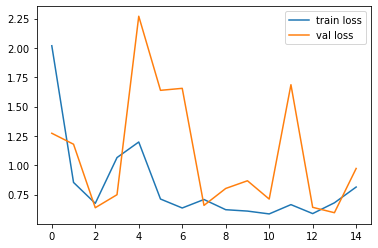

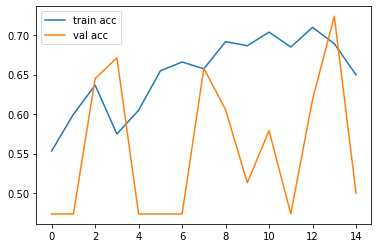

<Figure size 432x288 with 0 Axes>

In [23]:
# plot the loss

import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy

plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [24]:
# save it as a h5 file
from tensorflow.keras.models import load_model
model.save('model_vgg16.h6')

INFO:tensorflow:Assets written to: model_vgg16.h6\assets


C:\Users\yoges\anaconda3\envs\tensorflow2\lib\site-packages\keras\utils\generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [25]:

y_pred = model.predict(test_set)


In [26]:
y_pred

array([[2.3837449e-02, 9.7616255e-01],
       [5.0863072e-02, 9.4913691e-01],
       [4.9631069e-03, 9.9503690e-01],
       [3.8748154e-01, 6.1251843e-01],
       [1.9949549e-01, 8.0050445e-01],
       [8.2104370e-02, 9.1789567e-01],
       [1.4276500e-01, 8.5723501e-01],
       [1.2730809e-01, 8.7269193e-01],
       [3.1721082e-01, 6.8278915e-01],
       [4.4737959e-01, 5.5262041e-01],
       [5.5918708e-02, 9.4408131e-01],
       [5.6121850e-01, 4.3878150e-01],
       [1.6604441e-01, 8.3395559e-01],
       [1.4220153e-01, 8.5779852e-01],
       [5.7906222e-01, 4.2093781e-01],
       [5.1490420e-01, 4.8509583e-01],
       [8.6706087e-02, 9.1329390e-01],
       [2.9143149e-01, 7.0856851e-01],
       [1.9567341e-01, 8.0432653e-01],
       [2.3735238e-02, 9.7626477e-01],
       [7.8394450e-03, 9.9216050e-01],
       [2.7890196e-01, 7.2109807e-01],
       [6.0772681e-01, 3.9227322e-01],
       [6.4375803e-02, 9.3562418e-01],
       [1.0082081e-01, 8.9917916e-01],
       [5.4134381e-01, 4.

In [27]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [28]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1], dtype=int64)

In [29]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [31]:
model=load_model('model_vgg16.h6')

In [32]:
model

In [33]:
img=image.load_img('Datasets/test/cats/cat.4259.jpg',target_size=(224,224))

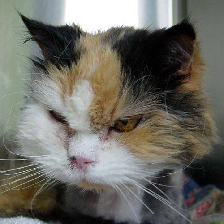

In [41]:
img

In [42]:
x=image.img_to_array(img)
x

array([[[138., 150., 128.],
        [137., 149., 127.],
        [139., 151., 129.],
        ...,
        [ 92.,  97.,  91.],
        [ 96.,  98.,  93.],
        [ 96.,  98.,  93.]],

       [[137., 149., 127.],
        [141., 153., 131.],
        [141., 153., 131.],
        ...,
        [ 95., 100.,  94.],
        [ 94.,  96.,  91.],
        [ 94.,  96.,  91.]],

       [[139., 151., 129.],
        [141., 153., 131.],
        [141., 153., 131.],
        ...,
        [ 95., 100.,  94.],
        [ 95.,  97.,  92.],
        [ 95.,  97.,  92.]],

       ...,

       [[158., 170., 182.],
        [171., 183., 195.],
        [166., 178., 190.],
        ...,
        [ 99., 103.,  88.],
        [106., 100.,  84.],
        [109., 100.,  85.]],

       [[165., 177., 191.],
        [167., 179., 193.],
        [159., 171., 185.],
        ...,
        [110., 111.,  93.],
        [120., 111.,  94.],
        [112., 101.,  83.]],

       [[164., 176., 188.],
        [162., 174., 186.],
        [168., 1

In [43]:
x.shape

(224, 224, 3)

In [44]:
x=x/255

In [45]:
x

array([[[0.5411765 , 0.5882353 , 0.5019608 ],
        [0.5372549 , 0.58431375, 0.49803922],
        [0.54509807, 0.5921569 , 0.5058824 ],
        ...,
        [0.36078432, 0.38039216, 0.35686275],
        [0.3764706 , 0.38431373, 0.3647059 ],
        [0.3764706 , 0.38431373, 0.3647059 ]],

       [[0.5372549 , 0.58431375, 0.49803922],
        [0.5529412 , 0.6       , 0.5137255 ],
        [0.5529412 , 0.6       , 0.5137255 ],
        ...,
        [0.37254903, 0.39215687, 0.36862746],
        [0.36862746, 0.3764706 , 0.35686275],
        [0.36862746, 0.3764706 , 0.35686275]],

       [[0.54509807, 0.5921569 , 0.5058824 ],
        [0.5529412 , 0.6       , 0.5137255 ],
        [0.5529412 , 0.6       , 0.5137255 ],
        ...,
        [0.37254903, 0.39215687, 0.36862746],
        [0.37254903, 0.38039216, 0.36078432],
        [0.37254903, 0.38039216, 0.36078432]],

       ...,

       [[0.61960787, 0.6666667 , 0.7137255 ],
        [0.67058825, 0.7176471 , 0.7647059 ],
        [0.6509804 , 0

In [46]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [48]:
img_data

array([[[[-103.43704 , -116.190765, -123.138824],
         [-103.44096 , -116.19469 , -123.142746],
         [-103.43312 , -116.186844, -123.1349  ],
         ...,
         [-103.58214 , -116.398605, -123.319214],
         [-103.574295, -116.394684, -123.30353 ],
         [-103.574295, -116.394684, -123.30353 ]],

        [[-103.44096 , -116.19469 , -123.142746],
         [-103.42528 , -116.179   , -123.12706 ],
         [-103.42528 , -116.179   , -123.12706 ],
         ...,
         [-103.57037 , -116.38684 , -123.30745 ],
         [-103.58214 , -116.40253 , -123.31137 ],
         [-103.58214 , -116.40253 , -123.31137 ]],

        [[-103.43312 , -116.186844, -123.1349  ],
         [-103.42528 , -116.179   , -123.12706 ],
         [-103.42528 , -116.179   , -123.12706 ],
         ...,
         [-103.57037 , -116.38684 , -123.30745 ],
         [-103.57822 , -116.398605, -123.30745 ],
         [-103.57822 , -116.398605, -123.30745 ]],

        ...,

        [[-103.22528 , -116.112335, -1

In [50]:
model.predict(img_data)

array([[7.7087798e-06, 9.9999225e-01]], dtype=float32)

In [54]:
a=np.argmax(model.predict(img_data), axis=1)

In [55]:
if a==0:
    print("The image classified is cat")
else:
    
    print("The image classified is dog")

The image classified is dog
